# Airplane Crash Survival Classification Model

Using Logistic Regression



In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Classification_train.csv")

#### Dataset Analysis 

5 object types rest int or float.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       890 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


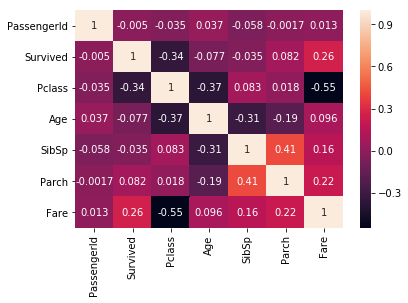

In [4]:
sns.heatmap(dataset.corr(), annot=True) # Only for numeric relations

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.describe(include=['O']) #shows no. of unique values for string/categorical data and top values with freq

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,890
unique,891,2,681,147,3
top,"Reynaldo, Ms. Encarnacion",male,347082,B96 B98,S
freq,1,577,7,4,645


In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         1
dtype: int64

In [9]:
dataset[['Sex','Survived']].groupby(by=['Sex'],as_index=False).mean() #female survived more

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
dataset[['Pclass','Survived']].groupby(by=['Pclass'],as_index=False).mean() # p1 class passenger survived more

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


By looking at the dataset, some features can be removed :-

1) PassengerId - since irelevant to survival  
2) Name - The title may/may not be useful, high irrelevance factor    
3) Cabin - Many NaN / Null values  
4) Ticket - Fare is already considered, the ticket shouldn't be related to survival   


#### Dataset Cleaning

In [11]:
dataset = dataset.drop(dataset.columns[[0,3,8,10]],axis=1)

In [12]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
# Embarked column having Missing String Values... ONLY 1 missing still......

most_occ = pd.get_dummies(dataset['Embarked']).sum().sort_values(ascending=False).index[0] 

def replace_nan(x):
    if pd.isnull(x):
        return most_occ
    else:
        return x

dataset['Embarked'] = dataset['Embarked'].map(replace_nan) #apply function to original data

In [14]:
X=dataset.iloc[:,1:8].values

y=dataset.iloc[:,0].values

In [15]:
X_test=pd.read_csv("Classification_test.csv")
y_test=pd.read_csv("Classification_ytest.csv")
X_test= X_test.drop(X_test.columns[[0,2,7,9]],axis=1).iloc[:,:].values
y_test=y_test.drop(y_test.columns[0],axis=1).iloc[:,:].values

In [16]:
# Age column having 177 missing values : dataset['Age'].isnull().sum() in training 
# Also for test dataset.

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer = imputer.fit(X[:,2:3])
X[:,2:3] = imputer.transform(X[:,2:3])

imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer = imputer.fit(X_test[:,2:3])
X_test[:,2:3] = imputer.transform(X_test[:,2:3])

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X_test[:,5:6])
X_test[:,5:6] = imputer.transform(X_test[:,5:6])

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# for Embarked
labelencoder_X = LabelEncoder()
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])
X_test[:, 6] = labelencoder_X.fit_transform(X_test[:, 6])

#for Sex column

X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X_test[:, 1] = labelencoder_X.fit_transform(X_test[:, 1])


In [18]:
# For Classification purposes, categorical data
onehotencoder = OneHotEncoder(categorical_features = [0,1,6])
X = onehotencoder.fit_transform(X).toarray()
X_test = onehotencoder.fit_transform(X_test).toarray()

## Predictions using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
y_pred = lr.predict(X_test)

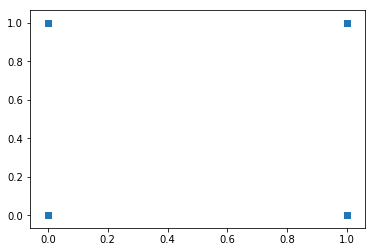

In [20]:
plt.scatter(y_test, y_pred, marker=',')

## Classification Reports & Confusion Matrix


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96       266
          1       0.92      0.93      0.93       152

avg / total       0.95      0.95      0.95       418



In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[254  12]
 [ 10 142]]
